In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from IPython.display import clear_output


# show all columns in DF
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/train.csv', header=0)
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
target_names = ['1 - Spruce/Fir', '2 - Lodgepole Pine', '3 - Ponderosa Pine', 
                '4 - Cottonwood/Willow', '5 - Aspen', '6 - Douglas-fir',
                '7 - Krummholz']

In [4]:
# Drop the ID and last column (Cover Type)
data = df.drop(['Id', df.columns[len(df.columns) - 1]], axis=1)
data.shape

(15120, 54)

In [5]:
# Store the cover type in labels
labels = df[df.columns[len(df.columns) - 1]]
labels.shape

(15120,)

In [6]:
for column in data.columns:
    print(data[column].describe(), "\n")

count    15120.000000
mean      2749.322553
std        417.678187
min       1863.000000
25%       2376.000000
50%       2752.000000
75%       3104.000000
max       3849.000000
Name: Elevation, dtype: float64 

count    15120.000000
mean       156.676653
std        110.085801
min          0.000000
25%         65.000000
50%        126.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64 

count    15120.000000
mean        16.501587
std          8.453927
min          0.000000
25%         10.000000
50%         15.000000
75%         22.000000
max         52.000000
Name: Slope, dtype: float64 

count    15120.000000
mean       227.195701
std        210.075296
min          0.000000
25%         67.000000
50%        180.000000
75%        330.000000
max       1343.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64 

count    15120.000000
mean        51.076521
std         61.239406
min       -146.000000
25%          5.000000
50%         32.000000
75%         

In [7]:
# find columns with no variance
for column in data.columns:
    if data[column].std() == 0:
        print('Std dev 0: {}'.format(column))
        #data.drop([column], axis=1, inplace=True)

# print(data.shape)

Std dev 0: Soil_Type7
Std dev 0: Soil_Type15


In [8]:
# size of each class
labels.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.33, random_state=42)

In [10]:
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

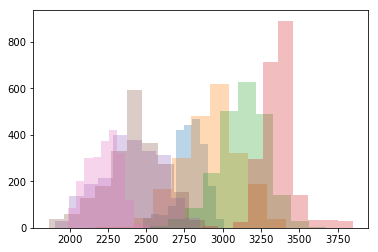

In [11]:
kwargs = dict(histtype='stepfilled', alpha=0.3)

for label in labels.unique():
    plt.hist(data.Elevation[labels==label], **kwargs)

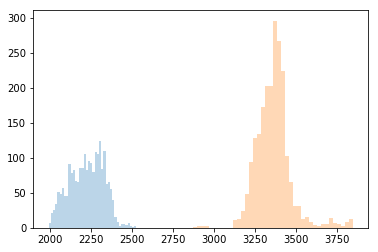

In [12]:
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(data.Elevation[labels==4], **kwargs)
plt.hist(data.Elevation[labels==7], **kwargs);

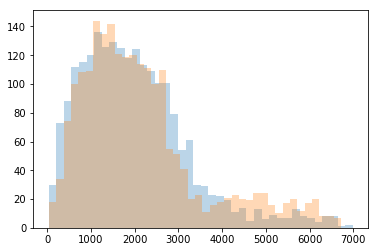

In [13]:
plt.hist(data.Horizontal_Distance_To_Fire_Points[labels==1], **kwargs)
plt.hist(data.Horizontal_Distance_To_Fire_Points[labels==2], **kwargs);

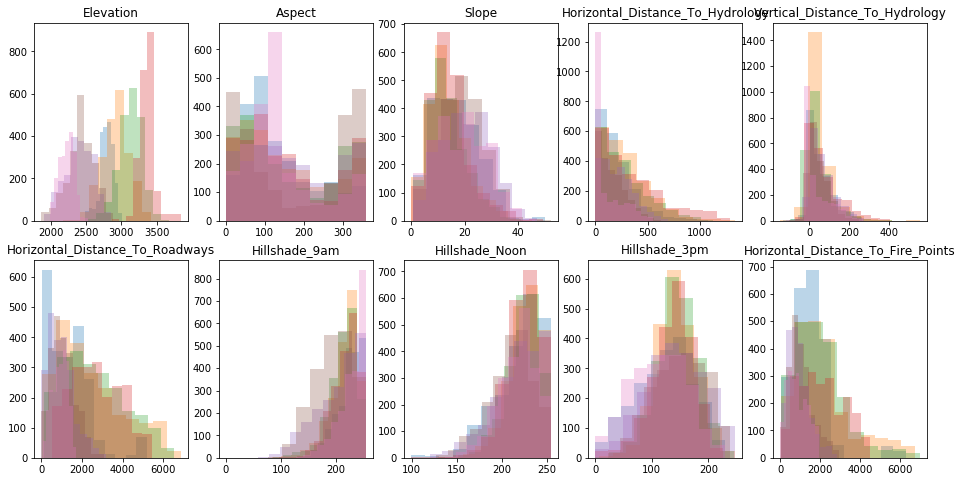

In [14]:
kwargs = dict(histtype='stepfilled', alpha=0.3)

fig, ax = plt.subplots(2, 5, figsize=(16, 8))
for i, axi in enumerate(ax.flat):
    for label in labels.unique():
        axi.hist(data.ix[labels==label, i], **kwargs)
    axi.set_title(data.columns[i])

In [15]:
# Count different soil types
data.loc[:, 'Soil_Type1':'Soil_Type40'].sum(axis=1).describe()

count    15120.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

In [16]:
# Count at different wilderness areass
data.loc[:, 'Wilderness_Area1':'Wilderness_Area4'].sum(axis=1).describe()

count    15120.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

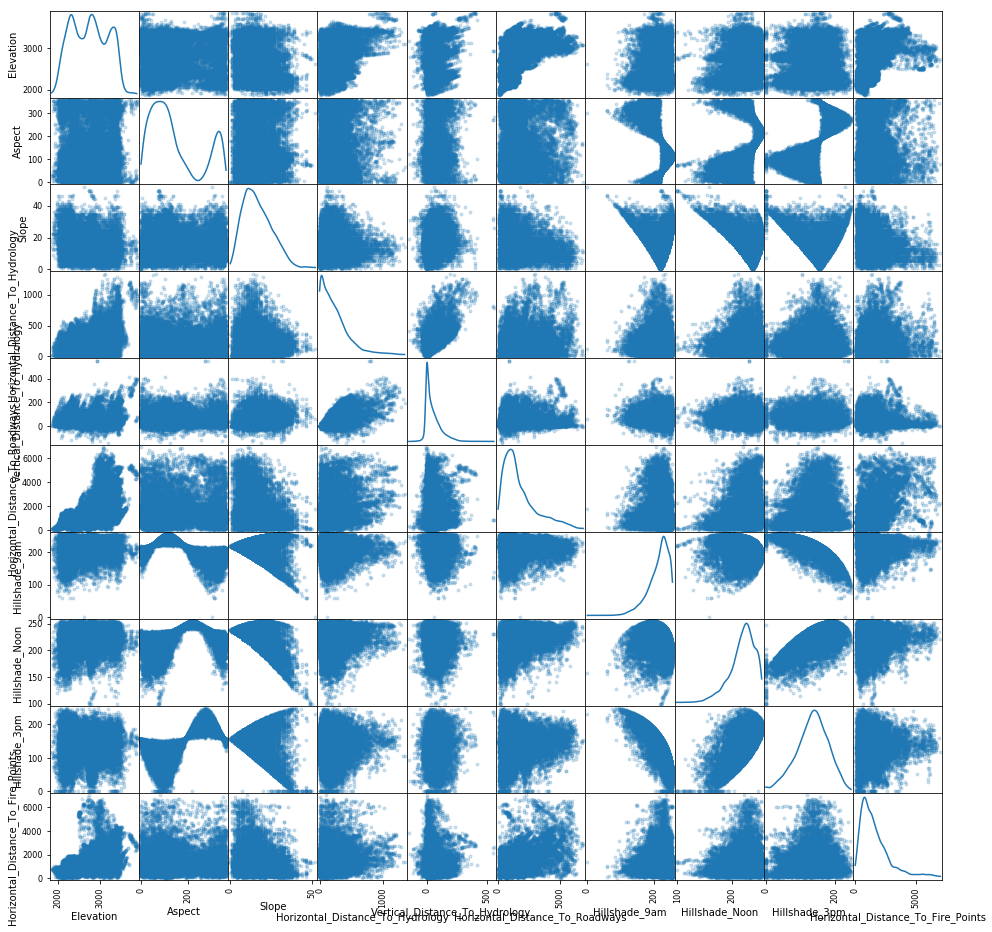

In [17]:
pd.tools.plotting.scatter_matrix(data.iloc[:, 0:10], alpha=0.2, figsize=(16, 16), diagonal='kde');

## Helper Functions

In [18]:
def split_data(data, labels):
    X_train, X_test, y_train, y_test = train_test_split(
        data, labels, test_size=0.33, random_state=40)
    return X_train, y_train, X_test, y_test

### PCA

In [69]:
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_train_std)

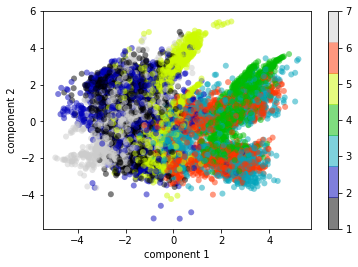

In [70]:
plt.scatter(X_2D[:, 0], X_2D[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 7))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

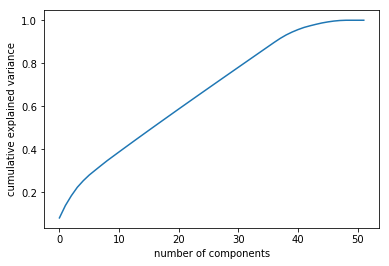

In [72]:
pca = PCA(n_components=52)
pca.fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## SVM

In [73]:
model = make_pipeline(SVC())

param_grid = {
    'svc__kernel': ['linear', 'rbf'],  # 'linear', 'rbf'
    'svc__C': [50, 100, 200],  # 1, 5, 10, 50, 100, 200
    'svc__gamma': [.01, .05, .1]}  # 0.0001, 0.0005, 0.001, 0.005, .01, .1
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
%time grid.fit(X_train_std, y_train)

CPU times: user 4.13 s, sys: 158 ms, total: 4.29 s
Wall time: 4min 5s


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'svc__kernel': ['linear', 'rbf'], 'svc__gamma': [0.01, 0.05, 0.1], 'svc__C': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [74]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test_std)

{'svc__C': 100, 'svc__gamma': 0.05, 'svc__kernel': 'rbf'}


In [75]:
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.73      0.72      0.73       679
   2 - Lodgepole Pine       0.72      0.65      0.68       722
   3 - Ponderosa Pine       0.80      0.75      0.77       704
4 - Cottonwood/Willow       0.91      0.96      0.93       739
            5 - Aspen       0.88      0.91      0.89       721
      6 - Douglas-fir       0.80      0.83      0.82       722
        7 - Krummholz       0.93      0.97      0.95       703

          avg / total       0.83      0.83      0.83      4990



## Logistic Regression

In [156]:
model = make_pipeline(PCA(), PolynomialFeatures(), LogisticRegression())
c_vals = [1, 2, 4, 10] #[.0001, 0.001, 0.01, 0.1, 1, 2, 4, 10, 20, 50, 100]
tol = [.01]
param_grid = {
    'pca__n_components': range(21, 23),
    'polynomialfeatures__degree': range(1, 3),
    'logisticregression__C': c_vals,
    'logisticregression__tol': tol,
    'logisticregression__penalty': ['l2', 'l1']
}
grid = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=6)
%time grid.fit(X_train_std, y_train)
print('Best params for Logistic Regression: {}'. \
      format(grid.best_params_))

CPU times: user 30.1 s, sys: 504 ms, total: 30.6 s
Wall time: 15min 32s
Best params for Logistic Regression: {'logisticregression__penalty': 'l2', 'polynomialfeatures__degree': 2, 'logisticregression__tol': 0.01, 'logisticregression__C': 10, 'pca__n_components': 22}


In [157]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test_std)

{'logisticregression__penalty': 'l2', 'polynomialfeatures__degree': 2, 'logisticregression__tol': 0.01, 'logisticregression__C': 10, 'pca__n_components': 22}


In [158]:
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.66      0.65      0.65       679
   2 - Lodgepole Pine       0.67      0.57      0.61       722
   3 - Ponderosa Pine       0.70      0.68      0.69       704
4 - Cottonwood/Willow       0.83      0.95      0.88       739
            5 - Aspen       0.80      0.86      0.82       721
      6 - Douglas-fir       0.74      0.72      0.73       722
        7 - Krummholz       0.91      0.90      0.90       703

          avg / total       0.76      0.76      0.76      4990



## GMM

In [109]:
def run_exp(pca_n, gmm_n, cov_type):

    pca = PCA(n_components=pca_n)
    pca.fit(X_train_std)
    X_train_pca = pca.transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    
    all_scores = np.zeros(y_test.shape)
    for label in range(1, len(target_names) + 1):
        X = X_train_pca[np.where(y_train == label)]
        gmm = GaussianMixture(n_components=gmm_n,
                              covariance_type=cov_type)
        gmm.fit(X)
        scores = gmm.score_samples(X_test_pca)
        all_scores = np.column_stack((all_scores, scores))
        
    all_scores = np.delete(all_scores, (0), axis=1)
    
    # choose the max index for each row for pred
    y_pred = all_scores.argmax(axis=1)
    y_pred = y_pred + 1
    accuracy = np.mean(y_pred == y_test)
    return accuracy

matrix_types = ('spherical', 'diag', 'tied', 'full')
n_pca_components = range(1, 55)
n_gmm_components = range(1, 55)
accuracies = []

for cov_type in matrix_types:
    for pca_n in n_pca_components:
        for gmm_n in n_gmm_components:
            accuracy = run_exp(pca_n=pca_n, 
                               gmm_n=gmm_n,
                               cov_type=cov_type)
            accuracies.append({'accuracy': accuracy, 'cov_type': cov_type,
                               'pca_n': pca_n, 'gmm_n': gmm_n})
            clear_output()
            print(len(accuracies))

print(sorted(accuracies, key=lambda k: k['accuracy'])[-1])

11664
{'pca_n': 9, 'cov_type': 'full', 'gmm_n': 42, 'accuracy': 0.80781563126252509}


## Forest Methods

In [206]:
X_train, y_train, X_test, y_test = split_data(data, labels)

model = make_pipeline(DecisionTreeClassifier())

param_grid = {
    'decisiontreeclassifier__splitter': ['best', 'random'], 
    'decisiontreeclassifier__criterion': ['entropy', 'gini'],
    'decisiontreeclassifier__max_features': [None, 'sqrt', .5, .75],
    'decisiontreeclassifier__max_depth': [None, 20, 30],
    'decisiontreeclassifier__random_state': [42],
}
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
%time grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s


CPU times: user 940 ms, sys: 139 ms, total: 1.08 s
Wall time: 2.01 s


[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    1.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'decisiontreeclassifier__max_depth': [None, 20, 30], 'decisiontreeclassifier__random_state': [42], 'decisiontreeclassifier__splitter': ['best', 'random'], 'decisiontreeclassifier__criterion': ['entropy', 'gini'], 'decisiontreeclassifier__max_features': [None, 'sqrt', 0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [207]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

{'decisiontreeclassifier__max_depth': 30, 'decisiontreeclassifier__random_state': 42, 'decisiontreeclassifier__splitter': 'random', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_features': None}
                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.67      0.69      0.68       722
   2 - Lodgepole Pine       0.66      0.61      0.63       750
   3 - Ponderosa Pine       0.74      0.72      0.73       690
4 - Cottonwood/Willow       0.92      0.93      0.92       727
            5 - Aspen       0.86      0.88      0.87       701
      6 - Douglas-fir       0.74      0.74      0.74       708
        7 - Krummholz       0.90      0.94      0.92       692

          avg / total       0.78      0.78      0.78      4990



In [208]:
X_train, y_train, X_test, y_test = split_data(data, labels)

model = make_pipeline(RandomForestClassifier())

param_grid = {
    'randomforestclassifier__n_estimators': [1000, 2000, 3000], 
    'randomforestclassifier__criterion': ['entropy', 'gini'],
    'randomforestclassifier__max_features': ['sqrt', 20],
    'randomforestclassifier__max_depth': [25, 30, 35],
    'randomforestclassifier__bootstrap': [True, False],
}
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
%time grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 33.5min finished


CPU times: user 50.4 s, sys: 895 ms, total: 51.3 s
Wall time: 34min 19s


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestclassifier__criterion': ['entropy', 'gini'], 'randomforestclassifier__max_depth': [25, 30, 35], 'randomforestclassifier__n_estimators': [1000, 2000, 3000], 'randomforestclassifier__max_features': ['sqrt', 20], 'randomforestclassifier__bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [209]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_features': 20, 'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__max_depth': 30}
                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.79      0.78      0.78       722
   2 - Lodgepole Pine       0.79      0.71      0.75       750
   3 - Ponderosa Pine       0.87      0.85      0.86       690
4 - Cottonwood/Willow       0.94      0.97      0.96       727
            5 - Aspen       0.91      0.94      0.92       701
      6 - Douglas-fir       0.86      0.89      0.88       708
        7 - Krummholz       0.93      0.97      0.95       692

          avg / total       0.87      0.87      0.87      4990



In [211]:
X_train, y_train, X_test, y_test = split_data(data, labels)

abc = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=42), 
    n_estimators=200, learning_rate=0.1)

abc.fit(X_train, y_train)
print ('Accuracy (adaboost with decision trees):', abc.score(X_test, y_test))

Accuracy (adaboost with decision trees): 0.778356713427


In [204]:
X_train, y_train, X_test, y_test = split_data(data, labels)

model = make_pipeline(GradientBoostingClassifier())

param_grid = {
    'gradientboostingclassifier__n_estimators': [1000, 2000, 3000], 
    'gradientboostingclassifier__max_features': ['sqrt', 10, 20],
    'gradientboostingclassifier__max_depth': [5, 10, 15,],
    'gradientboostingclassifier__learning_rate': [.05, .1],
}
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
%time grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 37.9min finished


CPU times: user 1min 57s, sys: 773 ms, total: 1min 58s
Wall time: 39min 50s


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gradientboostingclassifier__max_features': ['sqrt', 10, 20], 'gradientboostingclassifier__n_estimators': [1000, 2000, 3000], 'gradientboostingclassifier__learning_rate': [0.05, 0.1], 'gradientboostingclassifier__max_depth': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [205]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

{'gradientboostingclassifier__max_features': 20, 'gradientboostingclassifier__n_estimators': 2000, 'gradientboostingclassifier__max_depth': 15, 'gradientboostingclassifier__learning_rate': 0.05}
                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.78      0.75      0.77       722
   2 - Lodgepole Pine       0.77      0.71      0.74       750
   3 - Ponderosa Pine       0.85      0.85      0.85       690
4 - Cottonwood/Willow       0.95      0.97      0.96       727
            5 - Aspen       0.90      0.93      0.92       701
      6 - Douglas-fir       0.85      0.88      0.86       708
        7 - Krummholz       0.93      0.96      0.95       692

          avg / total       0.86      0.86      0.86      4990



## Helper Functions

In [133]:


def run_rand_forest(X_train, y_train, X_test, y_test): 
    rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='sqrt', n_jobs=-1)
    rfc.fit(X_train, y_train)
    accuracy = rfc.score(X_test, y_test)
    return accuracy

def run_ridge(X_train, y_train, X_test, y_test, alpha=.1):
    ridge = RidgeClassifier(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    return ridge.score(X_test, y_test)

## Feature Selection

In [19]:
def remove_features(data, feature_list):
    new_data = data.copy(deep=True)
    new_data.drop(new_data.columns[feature_list], axis=1, inplace=True)
    return new_data

In [20]:
X_train, y_train, X_test, y_test = split_data(data, labels)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

max_columns = data.shape[1]

max_accuracy = 0
bad_features = []
for i in range(0, max_columns):
    lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
    lr_pipe.fit(X_train.as_matrix()[:, 0:i+1], y_train)
    y_pred = lr_pipe.predict(X_test.as_matrix()[:, 0:i+1])
    
    new_accurancy = np.mean(y_pred == y_test)
    
    if new_accurancy < max_accuracy:
        bad_features.append(i)
    
    if new_accurancy > max_accuracy:
        max_accuracy = new_accurancy
    
    print("Column {}:".format(i), new_accurancy, 'worse' if i in bad_features else '')

Column 0: 0.540480961924 
Column 1: 0.527254509018 worse
Column 2: 0.523046092184 worse
Column 3: 0.537875751503 worse
Column 4: 0.541482965932 
Column 5: 0.543286573146 
Column 6: 0.578356713427 
Column 7: 0.592585170341 
Column 8: 0.594388777555 
Column 9: 0.595591182365 
Column 10: 0.605611222445 
Column 11: 0.604809619238 worse
Column 12: 0.612024048096 
Column 13: 0.612224448898 
Column 14: 0.61503006012 
Column 15: 0.619038076152 
Column 16: 0.620641282565 
Column 17: 0.639879759519 
Column 18: 0.637274549098 worse
Column 19: 0.639278557114 worse
Column 20: 0.639278557114 worse
Column 21: 0.639278557114 worse
Column 22: 0.639679358717 worse
Column 23: 0.653507014028 
Column 24: 0.651503006012 worse
Column 25: 0.65751503006 
Column 26: 0.658517034068 
Column 27: 0.659919839679 
Column 28: 0.659919839679 
Column 29: 0.659519038076 worse
Column 30: 0.661122244489 
Column 31: 0.663527054108 
Column 32: 0.663126252505 worse
Column 33: 0.663927855711 
Column 34: 0.663927855711 
Column 

In [22]:
# New accuracy with removed features

new_data = remove_features(data, bad_features)

print(new_data.shape)

X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

new_accuracy = np.mean(y_pred == y_test)
new_accuracy

(15120, 32)


0.6667334669338677

## Feature Engineering

In [55]:
## Base Line Logistic

X_train, y_train, X_test, y_test = split_data(data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.67855711422845688

In [56]:
# msk = (y_test == 1) & (preds != 1)
# X_test.ix[msk]

### Binning hillshade_noon

In [57]:
X_train, y_train, X_test, y_test = split_data(data, labels)

noon_bins = np.linspace(0, 255, 4)
which_bin = np.digitize(X_train.Hillshade_Noon, bins=noon_bins)

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin.reshape(-1, 1))
X_train_noon_binned = encoder.transform(which_bin.reshape(-1, 1))

In [58]:
X_train_with_binned = np.hstack([X_train.drop('Hillshade_Noon', axis=1), X_train_noon_binned])

which_bin = np.digitize(X_test.Hillshade_Noon, bins=noon_bins)
X_test_noon_binned = encoder.transform(which_bin.reshape(-1, 1))
X_test_with_binned = np.hstack([X_test.drop('Hillshade_Noon', axis=1), X_test_noon_binned])

In [59]:
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train_with_binned, y_train)
y_pred = lr_pipe.predict(X_test_with_binned)

accuracy = np.mean(y_pred == y_test)
accuracy

0.67414829659318642

### Convert aspect to cardinal direction (north, south, east, west)

In [105]:
def convert_to_cardinal(data):
    new_data = data.copy(deep=True)
    dir_labels = ['north east', 'east north', 'east south', 'south east', 
              'south west', 'west south', 'west north', 'north west']
    new_data.loc[:, ('direction')] = pd.cut(data.loc[:, ('Aspect')], range(0, 365, 45), right=False, labels=dir_labels)

    new_data.direction = new_data.direction.replace('east north', 'north') \
        .replace('north west', 'north') \
        .replace('east north', 'east').replace('east south', 'east').replace('south east', 'south') \
        .replace('south west', 'south').replace('west south', 'west').replace('west north', 'west') \
        .replace('north east', 'north')

    new_data = pd.get_dummies(new_data)
    new_data.drop(['Aspect'], axis=1, inplace=True)
    return new_data

In [106]:
new_data = convert_to_cardinal(data)
new_data.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,direction_east,direction_north,direction_south,direction_west
0,2596,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2590,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2804,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2785,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2595,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [107]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.68316633266533067

### Convert horizontal and vertical distance to hydrology to euclidean distance

In [77]:
new_data = data.copy(deep=True)

new_data.loc[:, ('euclid_to_hydro')] = np.sqrt(new_data.Horizontal_Distance_To_Hydrology ** 2 \
                                               + new_data.Vertical_Distance_To_Hydrology ** 2)

new_data.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 
              axis=1, inplace=True)
new_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,euclid_to_hydro
0,2596,51,3,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,258.000000
1,2590,56,2,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,212.084889
2,2804,139,9,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,275.769832
3,2785,155,18,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,269.235956
4,2595,45,2,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,153.003268


In [78]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.67434869739478953

### Multiply elevation and Slope

In [82]:
def multiply_elevation_slope(data=None):
    new_data = data.copy(deep=True)
    new_data.loc[:, ('elevation_x_slope')] = new_data.Elevation * new_data.Slope
    return new_data

new_data = multiply_elevation_slope(data)
new_data.drop(['Elevation', 'Slope'], axis=1, inplace=True)
new_data.head()

,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,elevation_x_slope
0,51,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7788
1,56,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5180
2,139,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25236
3,155,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,50130
4,45,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5190


In [83]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.64428857715430865

### Polynomial Features

In [35]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression())
c_vals = [20, 25, 30, 35]
tol = [.01]
penalty = ['l1', 'l2']
degree = range(1, 3)
param_grid = {
    'polynomialfeatures__degree': degree,
    'logisticregression__C': c_vals,
    'logisticregression__tol': tol,
    'logisticregression__penalty': penalty,
}
grid = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

X_train, y_train, X_test, y_test = split_data(data, labels)

%time grid.fit(X_train, y_train)
print('Best params for Logistic Regression: {}'. \
      format(grid.best_params_))

print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy: {}'.format(np.mean(y_pred == y_test)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  8.5min finished


CPU times: user 2min, sys: 730 ms, total: 2min 1s
Wall time: 10min 28s
Best params for Logistic Regression: {'polynomialfeatures__degree': 2, 'logisticregression__tol': 0.01, 'logisticregression__C': 25, 'logisticregression__penalty': 'l2'}
{'polynomialfeatures__degree': 2, 'logisticregression__tol': 0.01, 'logisticregression__C': 25, 'logisticregression__penalty': 'l2'}
Accuracy: 0.7791583166332665


#### Best Poly Features with Cardinal Direction

In [108]:
new_data = convert_to_cardinal(data)
X_train, y_train, X_test, y_test = split_data(new_data, labels)

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), 
                     LogisticRegression(C=25, tol=.01, penalty='l2'))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy: {}'.format(np.mean(y_pred == y_test)))

Accuracy: 0.7827655310621242


### Ground Features

In [92]:
# condense soil types based on their descriptions

######### Extremely_Stony #################
# 1 Cathedral family - Rock outcrop complex, extremely stony.
# 24 Leighcan family, extremely stony.
# 25 Leighcan family, warm, extremely stony.
# 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
# 28 Leighcan family - Rock outcrop complex, extremely stony.
# 29 Como - Legault families complex, extremely stony.
# 30 Como family - Rock land - Legault family complex, extremely stony.
# 31 Leighcan - Catamount families complex, extremely stony.
# 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
# 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
# 34 Cryorthents - Rock land complex, extremely stony.
# 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
# 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
# 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
# 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
# 40 Moran family - Cryorthents - Rock land complex, extremely stony.

######## Very_Stony #############
# 2 Vanet - Ratake families complex, very stony.
# 9 Troutville family, very stony.
# 18 Rogert family, very stony.
# 26 Granile - Catamount families complex, very stony.

####### Stony ############
# 6 Vanet - Wetmore families - Rock outcrop complex, stony.
# 12 Legault family - Rock land complex, stony.

####### Rubbly ##############
# 3 Haploborolis - Rock outcrop complex, rubbly.
# 4 Ratake family - Rock outcrop complex, rubbly.
# 5 Vanet family - Rock outcrop complex complex, rubbly.
# 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
# 11 Bullwark - Catamount families - Rock land complex, rubbly.
# 13 Catamount family - Rock land - Bullwark family complex, rubbly.

####### Complex ############
# 8 Supervisor - Limber families complex.
# 14 Pachic Argiborolis - Aquolis complex.
# 16 Cryaquolis - Cryoborolis complex.
# 17 Gateview family - Cryaquolis complex.
# 19 Typic Cryaquolis - Borohemists complex.
# 20 Typic Cryaquepts - Typic Cryaquolls complex.
# 21 Typic Cryaquolls - Leighcan family, till substratum complex.
# 23 Leighcan family, till substratum - Typic Cryaquolls complex.
# 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.

######### Extremely_Bouldery ###########
# 22 Leighcan family, till substratum, extremely bouldery.

######### Delete these since there's no data in our training set ########
# 7 Gothic family.
# 15 unspecified in the USFS Soil and ELU Survey.

new_data = data.copy(deep=True)

new_data['Extremely_Stony'] = ((new_data.Soil_Type1 + new_data.Soil_Type24 + \
                                new_data.Soil_Type25 + new_data.Soil_Type27 + \
                                new_data.Soil_Type28 + new_data.Soil_Type29 + \
                                new_data.Soil_Type30 + new_data.Soil_Type31 + \
                                new_data.Soil_Type32 + new_data.Soil_Type33 + \
                                new_data.Soil_Type34 + new_data.Soil_Type36 + \
                                new_data.Soil_Type37 + new_data.Soil_Type38 + \
                                new_data.Soil_Type39 + new_data.Soil_Type40) >= 1).astype(int)
new_data['Very_Stony'] = ((new_data.Soil_Type2 + new_data.Soil_Type9 + \
                           new_data.Soil_Type18 + new_data.Soil_Type26) >= 1).astype(int)
new_data['Stony'] = ((new_data.Soil_Type6 + new_data.Soil_Type12) >= 1).astype(int)
new_data['Rubbly'] = ((new_data.Soil_Type3 + new_data.Soil_Type4 + \
                       new_data.Soil_Type5 + new_data.Soil_Type10 + \
                       new_data.Soil_Type11 + new_data.Soil_Type13) >= 1).astype(int)
new_data['Complex'] = ((new_data.Soil_Type8 + new_data.Soil_Type14 + \
                       new_data.Soil_Type16 + new_data.Soil_Type17 + \
                       new_data.Soil_Type19 + new_data.Soil_Type20 + \
                       new_data.Soil_Type21 + new_data.Soil_Type23 + \
                       new_data.Soil_Type35) >= 1).astype(int)
new_data['Extremely_Bouldery'] = (new_data.Soil_Type22 >= 1).astype(int)

new_data.drop(new_data.columns[14:54], axis=1, inplace=True)
new_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Extremely_Stony,Very_Stony,Stony,Rubbly,Complex,Extremely_Bouldery
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,1,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,1,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,1,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,1,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,1,0,0,0,0,0


In [93]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.62444889779559121

### Total Sunlight

In [102]:
new_data = data.copy(deep=True)

new_data.loc[:, ('total_sun')] = new_data.Hillshade_9am + new_data.Hillshade_Noon + \
                                 new_data.Hillshade_3pm

new_data.drop(['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'], 
              axis=1, inplace=True)
new_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,total_sun
0,2596,51,3,258,0,510,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,601
1,2590,56,2,212,-6,390,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,606
2,2804,139,9,268,65,3180,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,607
3,2785,155,18,242,118,3090,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,598
4,2595,45,2,153,-1,391,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,604


In [103]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.66993987975951907

## Error analysis

In [90]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=30, 
                             bootstrap=False, n_estimators=1000, 
                             max_features='sqrt')
X_train, y_train, X_test, y_test = split_data(data, labels)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(np.mean(y_pred == y_test))

0.866933867735


In [131]:
# look at errors with cover type 1
msk = (y_pred != 1) & (y_test == 1)
X_errors_1 = X_test.loc[msk]
probs = rfc.predict_proba(X_errors_1)

preds_1 = y_pred[np.where(msk)]
test_1 = y_test[msk]
print(len(probs), len(preds_1), len(test_1))

print(probs[0:5])
print(preds_1[0:5])
print(test_1[0:5])

X_errors_1.head()
# for column in X_errors_1.columns:
#     print(X_errors_1[column][0:5], "\n")

173 173 173
[[ 0.42468421  0.52121053  0.          0.          0.012       0.016
   0.02610526]
 [ 0.33433333  0.3982971   0.02333333  0.          0.13136957  0.10266667
   0.01      ]
 [ 0.42862857  0.4518      0.          0.          0.003       0.
   0.11657143]
 [ 0.111       0.33        0.001       0.          0.506       0.          0.052     ]
 [ 0.4165      0.5795      0.          0.          0.          0.          0.004     ]]
[2 2 2 5 2]
14660    1
10150    1
1545     1
1169     1
1536     1
Name: Cover_Type, dtype: int64


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
14660,2991,353,17,268,-40,960,188,207,155,2076,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10150,2851,323,14,120,26,2466,183,224,181,2242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1545,3145,63,13,362,16,2200,231,214,113,2396,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1169,2868,72,20,30,15,1087,238,196,80,1758,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1536,3267,319,4,270,22,5675,208,235,166,592,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


array([1, 2, 3, 4, 5, 6, 7])

## Test results

In [109]:
test_df = pd.read_csv("../data/test.csv")
#test_df = test_df.drop(['Id'], axis=1)
test_df.head()

print(test_df.shape)

(565892, 55)


In [75]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=30, 
                             bootstrap=False, n_estimators=1000, 
                             max_features='sqrt', n_jobs=-1)
rfc.fit(data, labels)

test_df['Cover_Type'] = pd.Series(rfc.predict(test_df.drop(['Id'], axis=1)))

submission = pd.concat([test_df['Id'].astype(int), test_df['Cover_Type']], axis=1)
submission = submission.set_index('Id')
submission.to_csv('submission.csv')
submission.head()

,Cover_Type
Id,
15121,2
15122,1
15123,2
15124,2
15125,2


In [76]:
submission.shape

(565892, 1)

In [222]:
# {'svc__C': 100, 'svc__gamma': 0.05, 'svc__kernel': 'rbf'}
svc_pipe = make_pipeline(StandardScaler(), SVC(C=100, gamma=.05, kernel='rbf'))
svc_pipe.fit(data, labels)

test_df['Cover_Type'] = pd.Series(svc_pipe.predict(test_df.drop(['Id'], axis=1)))

submission = pd.concat([test_df['Id'].astype(int), test_df['Cover_Type']], axis=1)
submission = submission.set_index('Id')
submission.to_csv('submission.csv')
submission.head()

,Cover_Type
Id,
15121,2
15122,1
15123,2
15124,2
15125,2


### Logistic Regression

In [110]:
new_data = convert_to_cardinal(data)

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), 
                     LogisticRegression(C=25, tol=.01, penalty='l2'))
pipe.fit(new_data, labels)

new_test_df = convert_to_cardinal(test_df.drop(['Id'], axis=1))

output_df = pd.DataFrame()
output_df['Cover_Type'] = pd.Series(pipe.predict(new_test_df))

submission = pd.concat([test_df['Id'].astype(int), output_df['Cover_Type']], axis=1)
submission = submission.set_index('Id')
submission.to_csv('submission.csv')